In [17]:
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame, read_file
from shapely.geometry import Point, LineString, Polygon
from datetime import datetime, timedelta
from holoviews import opts, dim
import movingpandas as mpd
from geographiclib.geodesic import Geodesic
import warnings
warnings.filterwarnings('ignore')

import osmnx as ox
import networkx as nx
import plotly.graph_objects as go
import plotly.express as px
from datetime import datetime, timedelta

mpd.show_versions()


MovingPandas 0.9.rc2

SYSTEM INFO
-----------
python     : 3.9.9 | packaged by conda-forge | (main, Dec 20 2021, 02:40:17)  [GCC 9.4.0]
executable : /home/dy/anaconda3/envs/mp/bin/python
machine    : Linux-5.8.0-44-generic-x86_64-with-glibc2.31

GEOS, GDAL, PROJ INFO
---------------------
GEOS       : 3.10.1
GEOS lib   : /home/dy/anaconda3/envs/mp/lib/libgeos_c.so
GDAL       : 3.4.1
GDAL data dir: /home/dy/anaconda3/envs/mp/share/gdal
PROJ       : 8.2.1
PROJ data dir: /home/dy/anaconda3/envs/mp/share/proj

PYTHON DEPENDENCIES
-------------------
geopandas  : 0.10.2
pandas     : 1.3.5
fiona      : 1.8.20
numpy      : 1.21.5
shapely    : 1.8.0
rtree      : 0.9.7
pyproj     : 3.3.0
matplotlib : 3.5.1
mapclassify: 2.4.3
geopy      : 2.2.0
holoviews  : 1.14.7
hvplot     : 0.7.3
geoviews   : 1.9.3


In [18]:
FSIZE = 500

In [25]:
# filepath
fp = pd.read_csv('dtg_20191101.csv')

In [27]:
fp['timestamp'] = pd.to_datetime(fp['timestamp'])

In [28]:
fp.columns = ['t', 'trajectory_id', 'y', 'x', 'speed']

In [29]:
fp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   t              1048575 non-null  datetime64[ns]
 1   trajectory_id  1048575 non-null  int64         
 2   y              1048575 non-null  float64       
 3   x              1048575 non-null  float64       
 4   speed          1048575 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 40.0 MB


In [30]:
fp0001 = fp[(fp['t']>'2019-11-01 00:00:00') & (fp['t']<'2019-11-01 01:00:00')]
fp0102 = fp[(fp['t']>'2019-11-01 01:00:00') & (fp['t']<'2019-11-01 02:00:00')]
fp0203 = fp[(fp['t']>'2019-11-01 02:00:00') & (fp['t']<'2019-11-01 03:00:00')]
fp0304 = fp[(fp['t']>'2019-11-01 03:00:00') & (fp['t']<'2019-11-01 04:00:00')]
fp0405 = fp[(fp['t']>'2019-11-01 04:00:00') & (fp['t']<'2019-11-01 05:00:00')]
fp0506 = fp[(fp['t']>'2019-11-01 05:00:00') & (fp['t']<'2019-11-01 06:00:00')]
fp0607 = fp[(fp['t']>'2019-11-01 06:00:00') & (fp['t']<'2019-11-01 07:00:00')]
fp0708 = fp[(fp['t']>'2019-11-01 07:00:00') & (fp['t']<'2019-11-01 08:00:00')]
fp0809 = fp[(fp['t']>'2019-11-01 08:00:00') & (fp['t']<'2019-11-01 09:00:00')]
fp0910 = fp[(fp['t']>'2019-11-01 09:00:00') & (fp['t']<'2019-11-01 10:00:00')]
fp1011 = fp[(fp['t']>'2019-11-01 10:00:00') & (fp['t']<'2019-11-01 11:00:00')]
fp1112 = fp[(fp['t']>'2019-11-01 11:00:00') & (fp['t']<'2019-11-01 12:00:00')]
fp1213 = fp[(fp['t']>'2019-11-01 12:00:00') & (fp['t']<'2019-11-01 13:00:00')]
fp1314 = fp[(fp['t']>'2019-11-01 13:00:00') & (fp['t']<'2019-11-01 14:00:00')]
fp1415 = fp[(fp['t']>'2019-11-01 14:00:00') & (fp['t']<'2019-11-01 15:00:00')]
fp1516 = fp[(fp['t']>'2019-11-01 15:00:00') & (fp['t']<'2019-11-01 16:00:00')]
fp1617 = fp[(fp['t']>'2019-11-01 16:00:00') & (fp['t']<'2019-11-01 17:00:00')]
fp1718 = fp[(fp['t']>'2019-11-01 17:00:00') & (fp['t']<'2019-11-01 18:00:00')]
fp1819 = fp[(fp['t']>'2019-11-01 18:00:00') & (fp['t']<'2019-11-01 19:00:00')]
fp1920 = fp[(fp['t']>'2019-11-01 19:00:00') & (fp['t']<'2019-11-01 20:00:00')]
fp2021 = fp[(fp['t']>'2019-11-01 20:00:00') & (fp['t']<'2019-11-01 21:00:00')]
fp2122 = fp[(fp['t']>'2019-11-01 21:00:00') & (fp['t']<'2019-11-01 22:00:00')]
fp2223 = fp[(fp['t']>'2019-11-01 22:00:00') & (fp['t']<'2019-11-01 23:00:00')]
fp2324 = fp[(fp['t']>'2019-11-01 23:00:00') & (fp['t']<'2019-11-01 23:59:59')]

fp_all = fp[(fp['t']>'2019-11-01 00:00:00') & (fp['t']<'2019-11-01 23:59:59')]

In [31]:
traj_collection_0001 = mpd.TrajectoryCollection(fp0001, 'trajectory_id',t='t', x='x', y='y')
traj_collection_0102 = mpd.TrajectoryCollection(fp0102, 'trajectory_id',t='t', x='x', y='y')
traj_collection_0203 = mpd.TrajectoryCollection(fp0203, 'trajectory_id',t='t', x='x', y='y')
traj_collection_0304 = mpd.TrajectoryCollection(fp0304, 'trajectory_id',t='t', x='x', y='y')
traj_collection_0405 = mpd.TrajectoryCollection(fp0405, 'trajectory_id',t='t', x='x', y='y')
traj_collection_0506 = mpd.TrajectoryCollection(fp0506, 'trajectory_id',t='t', x='x', y='y')
traj_collection_0607 = mpd.TrajectoryCollection(fp0607, 'trajectory_id',t='t', x='x', y='y')
traj_collection_0708 = mpd.TrajectoryCollection(fp0708, 'trajectory_id',t='t', x='x', y='y')
traj_collection_0809 = mpd.TrajectoryCollection(fp0809, 'trajectory_id',t='t', x='x', y='y')
traj_collection_0910 = mpd.TrajectoryCollection(fp0910, 'trajectory_id',t='t', x='x', y='y')
traj_collection_1011 = mpd.TrajectoryCollection(fp1011, 'trajectory_id',t='t', x='x', y='y')
traj_collection_1112 = mpd.TrajectoryCollection(fp1112, 'trajectory_id',t='t', x='x', y='y')

traj_collection_1213 = mpd.TrajectoryCollection(fp1213, 'trajectory_id',t='t', x='x', y='y')
traj_collection_1314 = mpd.TrajectoryCollection(fp1314, 'trajectory_id',t='t', x='x', y='y')
traj_collection_1415 = mpd.TrajectoryCollection(fp1415, 'trajectory_id',t='t', x='x', y='y')
traj_collection_1516 = mpd.TrajectoryCollection(fp1516, 'trajectory_id',t='t', x='x', y='y')
traj_collection_1617 = mpd.TrajectoryCollection(fp1617, 'trajectory_id',t='t', x='x', y='y')
traj_collection_1718 = mpd.TrajectoryCollection(fp1718, 'trajectory_id',t='t', x='x', y='y')
traj_collection_1819 = mpd.TrajectoryCollection(fp1819, 'trajectory_id',t='t', x='x', y='y')
traj_collection_1920 = mpd.TrajectoryCollection(fp1920, 'trajectory_id',t='t', x='x', y='y')
traj_collection_2021 = mpd.TrajectoryCollection(fp2021, 'trajectory_id',t='t', x='x', y='y')
traj_collection_2122 = mpd.TrajectoryCollection(fp2122, 'trajectory_id',t='t', x='x', y='y')
traj_collection_2223 = mpd.TrajectoryCollection(fp2223, 'trajectory_id',t='t', x='x', y='y')
traj_collection_2324 = mpd.TrajectoryCollection(fp2324, 'trajectory_id',t='t', x='x', y='y')
traj_collection_all = mpd.TrajectoryCollection(fp_all, 'trajectory_id',t='t', x='x', y='y')

In [34]:
traj_collection_all = mpd.TrajectoryCollection(fp_all, 'trajectory_id',t='t', x='x', y='y')

In [36]:
print(traj_collection_all)

TrajectoryCollection with 286 trajectories


## [DTG] 대전시 차량 흐름도 

주행경로 시각화를 확인한 결과, 통행량이 많은 포인트와 구간에 가중치를 부여해 트래픽이 몰리는 지점과 구간을 시각화 하고 싶음.

<AxesSubplot:>

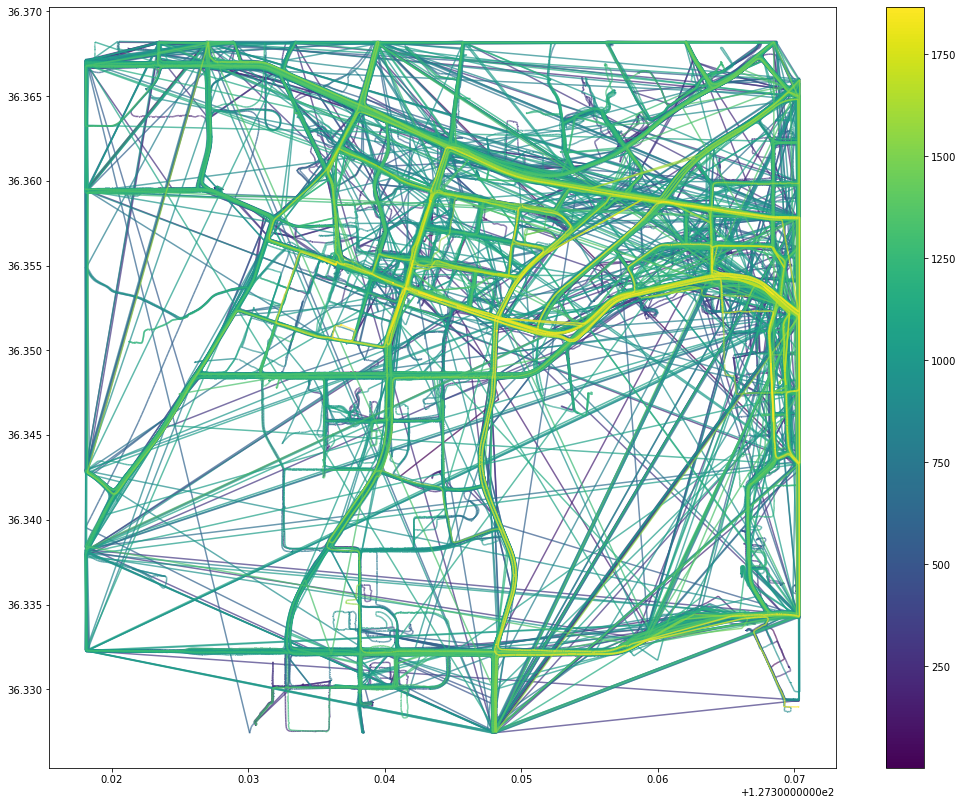

In [38]:
traj_collection_all.plot(column='trajectory_id', legend=True, figsize=(18,14), alpha=0.7)

#### 거리를 기준으로 일반화 

In [39]:
generalized_0001 = mpd.MinDistanceGeneralizer(traj_collection_0001).generalize(tolerance=100)
generalized_0102 = mpd.MinDistanceGeneralizer(traj_collection_0102).generalize(tolerance=100)
generalized_0203 = mpd.MinDistanceGeneralizer(traj_collection_0203).generalize(tolerance=100)
generalized_0304 = mpd.MinDistanceGeneralizer(traj_collection_0304).generalize(tolerance=100)
generalized_0405 = mpd.MinDistanceGeneralizer(traj_collection_0405).generalize(tolerance=100)
generalized_0506 = mpd.MinDistanceGeneralizer(traj_collection_0506).generalize(tolerance=100)
generalized_0607 = mpd.MinDistanceGeneralizer(traj_collection_0607).generalize(tolerance=100)
generalized_0708 = mpd.MinDistanceGeneralizer(traj_collection_0708).generalize(tolerance=100)
generalized_0809 = mpd.MinDistanceGeneralizer(traj_collection_0809).generalize(tolerance=100)
generalized_0910 = mpd.MinDistanceGeneralizer(traj_collection_0910).generalize(tolerance=100)
generalized_1011 = mpd.MinDistanceGeneralizer(traj_collection_1011).generalize(tolerance=100)
generalized_1112 = mpd.MinDistanceGeneralizer(traj_collection_1112).generalize(tolerance=100)

generalized_1213 = mpd.MinDistanceGeneralizer(traj_collection_1213).generalize(tolerance=100)
generalized_1314 = mpd.MinDistanceGeneralizer(traj_collection_1314).generalize(tolerance=100)
generalized_1415 = mpd.MinDistanceGeneralizer(traj_collection_1415).generalize(tolerance=100)
generalized_1516 = mpd.MinDistanceGeneralizer(traj_collection_1516).generalize(tolerance=100)
generalized_1617 = mpd.MinDistanceGeneralizer(traj_collection_1617).generalize(tolerance=100)
generalized_1718 = mpd.MinDistanceGeneralizer(traj_collection_1718).generalize(tolerance=100)
generalized_1819 = mpd.MinDistanceGeneralizer(traj_collection_1819).generalize(tolerance=100)
generalized_1920 = mpd.MinDistanceGeneralizer(traj_collection_1920).generalize(tolerance=100)
generalized_2021 = mpd.MinDistanceGeneralizer(traj_collection_2021).generalize(tolerance=100)
generalized_2122 = mpd.MinDistanceGeneralizer(traj_collection_2122).generalize(tolerance=100)
generalized_2223 = mpd.MinDistanceGeneralizer(traj_collection_2223).generalize(tolerance=100)
generalized_2324 = mpd.MinDistanceGeneralizer(traj_collection_2324).generalize(tolerance=100)

In [40]:
print(generalized_0910)
print(generalized_1819)

TrajectoryCollection with 48 trajectories
TrajectoryCollection with 49 trajectories


In [ ]:
# 시간을 기준으로 일반화 
# generalized_0001 = mpd.MinTimeDeltaGeneralizer(traj_collection_0001).generalize(tolerance=timedelta(minutes=10))
# generalized_0001

#### 

In [42]:
aggregator_0001 = mpd.TrajectoryCollectionAggregator(generalized_0001, min_distance=10, max_distance=500, min_stop_duration=timedelta(minutes=10))
aggregator_0102 = mpd.TrajectoryCollectionAggregator(generalized_0102, min_distance=10, max_distance=500, min_stop_duration=timedelta(minutes=10))
aggregator_0203 = mpd.TrajectoryCollectionAggregator(generalized_0203, min_distance=10, max_distance=500, min_stop_duration=timedelta(minutes=10))
aggregator_0304 = mpd.TrajectoryCollectionAggregator(generalized_0304, min_distance=10, max_distance=500, min_stop_duration=timedelta(minutes=10))
aggregator_0405 = mpd.TrajectoryCollectionAggregator(generalized_0405, min_distance=10, max_distance=500, min_stop_duration=timedelta(minutes=10))
aggregator_0506 = mpd.TrajectoryCollectionAggregator(generalized_0506, min_distance=10, max_distance=500, min_stop_duration=timedelta(minutes=10))
aggregator_0607 = mpd.TrajectoryCollectionAggregator(generalized_0607, min_distance=10, max_distance=500, min_stop_duration=timedelta(minutes=10))
aggregator_0708 = mpd.TrajectoryCollectionAggregator(generalized_0708, min_distance=10, max_distance=500, min_stop_duration=timedelta(minutes=10))
aggregator_0809 = mpd.TrajectoryCollectionAggregator(generalized_0809, min_distance=10, max_distance=500, min_stop_duration=timedelta(minutes=10))
aggregator_0910 = mpd.TrajectoryCollectionAggregator(generalized_0910, min_distance=10, max_distance=500, min_stop_duration=timedelta(minutes=10))
aggregator_1011 = mpd.TrajectoryCollectionAggregator(generalized_1011, min_distance=10, max_distance=500, min_stop_duration=timedelta(minutes=10))
aggregator_1112 = mpd.TrajectoryCollectionAggregator(generalized_1112, min_distance=10, max_distance=500, min_stop_duration=timedelta(minutes=10))

aggregator_1213 = mpd.TrajectoryCollectionAggregator(generalized_1213, min_distance=10, max_distance=500, min_stop_duration=timedelta(minutes=10))
aggregator_1314 = mpd.TrajectoryCollectionAggregator(generalized_1314, min_distance=10, max_distance=500, min_stop_duration=timedelta(minutes=10))
aggregator_1415 = mpd.TrajectoryCollectionAggregator(generalized_1415, min_distance=10, max_distance=500, min_stop_duration=timedelta(minutes=10))
aggregator_1516 = mpd.TrajectoryCollectionAggregator(generalized_1516, min_distance=10, max_distance=500, min_stop_duration=timedelta(minutes=10))
aggregator_1617 = mpd.TrajectoryCollectionAggregator(generalized_1617, min_distance=10, max_distance=500, min_stop_duration=timedelta(minutes=10))
aggregator_1718 = mpd.TrajectoryCollectionAggregator(generalized_1718, min_distance=10, max_distance=500, min_stop_duration=timedelta(minutes=10))
aggregator_1819 = mpd.TrajectoryCollectionAggregator(generalized_1819, min_distance=10, max_distance=500, min_stop_duration=timedelta(minutes=10))
aggregator_1920 = mpd.TrajectoryCollectionAggregator(generalized_1920, min_distance=10, max_distance=500, min_stop_duration=timedelta(minutes=10))
aggregator_2021 = mpd.TrajectoryCollectionAggregator(generalized_2021, min_distance=10, max_distance=500, min_stop_duration=timedelta(minutes=10))
aggregator_2122 = mpd.TrajectoryCollectionAggregator(generalized_2122, min_distance=10, max_distance=500, min_stop_duration=timedelta(minutes=10))
aggregator_2223 = mpd.TrajectoryCollectionAggregator(generalized_2223, min_distance=10, max_distance=500, min_stop_duration=timedelta(minutes=10))
aggregator_2324 = mpd.TrajectoryCollectionAggregator(generalized_2324, min_distance=10, max_distance=500, min_stop_duration=timedelta(minutes=10))

In [43]:
print(aggregator_0910)
print(aggregator_1819)

In [44]:
pts_0001 = aggregator_0001.get_significant_points_gdf()
pts_0102 = aggregator_0102.get_significant_points_gdf()
pts_0203 = aggregator_0203.get_significant_points_gdf()
pts_0304 = aggregator_0304.get_significant_points_gdf()
pts_0405 = aggregator_0405.get_significant_points_gdf()
pts_0506 = aggregator_0506.get_significant_points_gdf()
pts_0607 = aggregator_0607.get_significant_points_gdf()
pts_0708 = aggregator_0708.get_significant_points_gdf()
pts_0809 = aggregator_0809.get_significant_points_gdf()
pts_0910 = aggregator_0910.get_significant_points_gdf()
pts_1011 = aggregator_1011.get_significant_points_gdf()
pts_1112 = aggregator_1112.get_significant_points_gdf()

pts_1213 = aggregator_1213.get_significant_points_gdf()
pts_1314 = aggregator_1314.get_significant_points_gdf()
pts_1415 = aggregator_1415.get_significant_points_gdf()
pts_1516 = aggregator_1516.get_significant_points_gdf()
pts_1617 = aggregator_1617.get_significant_points_gdf()
pts_1718 = aggregator_1718.get_significant_points_gdf()
pts_1819 = aggregator_1819.get_significant_points_gdf()
pts_1920 = aggregator_1920.get_significant_points_gdf()
pts_2021 = aggregator_2021.get_significant_points_gdf()
pts_2122 = aggregator_2122.get_significant_points_gdf()
pts_2223 = aggregator_2223.get_significant_points_gdf()
pts_2324 = aggregator_2324.get_significant_points_gdf()

print(pts_0910)
print(pts_1819)

                        geometry
0     POINT (127.34809 36.32742)
1     POINT (127.37036 36.35992)
2     POINT (127.34820 36.33232)
3     POINT (127.34820 36.33232)
4     POINT (127.34961 36.33710)
...                          ...
1031  POINT (127.35680 36.35283)
1032  POINT (127.35680 36.35283)
1033  POINT (127.36277 36.35404)
1034  POINT (127.36277 36.35404)
1035  POINT (127.36838 36.35327)

[1036 rows x 1 columns]
                       geometry
0    POINT (127.37034 36.36508)
1    POINT (127.31810 36.36688)
2    POINT (127.36547 36.36288)
3    POINT (127.36547 36.36288)
4    POINT (127.36054 36.35940)
..                          ...
793  POINT (127.36847 36.34580)
794  POINT (127.36827 36.34925)
795  POINT (127.36827 36.34925)
796  POINT (127.36855 36.34459)
797  POINT (127.36871 36.34369)

[798 rows x 1 columns]


### cluster

다중 교차하는 지점에 대한 clustering

In [45]:
clusters_0001 = aggregator_0001.get_clusters_gdf()
clusters_0102 = aggregator_0102.get_clusters_gdf()
clusters_0203 = aggregator_0203.get_clusters_gdf()
clusters_0304 = aggregator_0304.get_clusters_gdf()
clusters_0405 = aggregator_0405.get_clusters_gdf()
clusters_0506 = aggregator_0506.get_clusters_gdf()
clusters_0607 = aggregator_0607.get_clusters_gdf()
clusters_0708 = aggregator_0708.get_clusters_gdf()
clusters_0809 = aggregator_0809.get_clusters_gdf()
clusters_0910 = aggregator_0910.get_clusters_gdf()
clusters_1011 = aggregator_1011.get_clusters_gdf()
clusters_1112 = aggregator_1112.get_clusters_gdf()

clusters_1213 = aggregator_1213.get_clusters_gdf()
clusters_1314 = aggregator_1314.get_clusters_gdf()
clusters_1415 = aggregator_1415.get_clusters_gdf()
clusters_1516 = aggregator_1516.get_clusters_gdf()
clusters_1617 = aggregator_1617.get_clusters_gdf()
clusters_1718 = aggregator_1718.get_clusters_gdf()
clusters_1819 = aggregator_1819.get_clusters_gdf()
clusters_1920 = aggregator_1920.get_clusters_gdf()
clusters_2021 = aggregator_2021.get_clusters_gdf()
clusters_2122 = aggregator_2122.get_clusters_gdf()
clusters_2223 = aggregator_2223.get_clusters_gdf()
clusters_2324 = aggregator_2324.get_clusters_gdf()

print(clusters_0910)
print(clusters_1819)

                      geometry   n
0   POINT (127.34797 36.32777)  14
1   POINT (127.36938 36.35788)  27
2   POINT (127.34744 36.33231)  23
3   POINT (127.34932 36.33763)  10
4   POINT (127.34743 36.34194)  12
5   POINT (127.34709 36.34790)  31
6   POINT (127.35415 36.35145)  31
7   POINT (127.35852 36.35444)  39
8   POINT (127.36296 36.35813)  44
9   POINT (127.36301 36.36539)  20
10  POINT (127.33949 36.36779)   6
11  POINT (127.35787 36.36045)  58
12  POINT (127.35223 36.35952)  51
13  POINT (127.34516 36.36133)  53
14  POINT (127.34028 36.36304)  19
15  POINT (127.33630 36.36414)  40
16  POINT (127.32922 36.36678)  40
17  POINT (127.32389 36.36707)  24
18  POINT (127.31907 36.36698)  11
19  POINT (127.34203 36.35468)  61
20  POINT (127.36947 36.34391)  13
21  POINT (127.36939 36.35157)  37
22  POINT (127.33997 36.34784)  25
23  POINT (127.33855 36.33139)  33
24  POINT (127.33675 36.35672)  22
25  POINT (127.33518 36.33683)   6
26  POINT (127.33184 36.33177)   9
27  POINT (127.34787

In [46]:
clusters = pd.concat([clusters_0001, clusters_0102, clusters_0203, clusters_0304, clusters_0405, clusters_0506, clusters_0607,
                     clusters_0708, clusters_0809, clusters_0910, clusters_1011, clusters_1112, clusters_1213, clusters_1314, 
                     clusters_1415, clusters_1516, clusters_1617, clusters_1718, clusters_1819, clusters_1920, clusters_2021, 
                     clusters_2122, clusters_2223, clusters_2324])

In [47]:
clusters

,geometry,n
0,POINT (127.36924 36.35264),131
1,POINT (127.36911 36.36585),39
2,POINT (127.36382 36.35656),165
3,POINT (127.35873 36.35365),56
4,POINT (127.35335 36.35115),59
...,...,...
47,POINT (127.31834 36.33228),2
48,POINT (127.31818 36.35475),2
49,POINT (127.32353 36.35252),2
50,POINT (127.35725 36.36359),18


In [49]:
clusters.to_csv('clusters.csv')

### flow

- cluster 구간에 대한 flow(origin -> dest) 생성
-  date type merge 

In [51]:
# before -> after flows
flows_0001 = aggregator_0001.get_flows_gdf()
flows_0102 = aggregator_0102.get_flows_gdf()
flows_0203 = aggregator_0203.get_flows_gdf()
flows_0304 = aggregator_0304.get_flows_gdf()
flows_0405 = aggregator_0405.get_flows_gdf()
flows_0506 = aggregator_0506.get_flows_gdf()
flows_0607 = aggregator_0607.get_flows_gdf()
flows_0708 = aggregator_0708.get_flows_gdf()
flows_0809 = aggregator_0809.get_flows_gdf()
flows_0910 = aggregator_0910.get_flows_gdf()
flows_1011 = aggregator_1011.get_flows_gdf()
flows_1112 = aggregator_1112.get_flows_gdf()

flows_1213 = aggregator_1213.get_flows_gdf()
flows_1314 = aggregator_1314.get_flows_gdf()
flows_1415 = aggregator_1415.get_flows_gdf()
flows_1516 = aggregator_1516.get_flows_gdf()
flows_1617 = aggregator_1617.get_flows_gdf()
flows_1718 = aggregator_1718.get_flows_gdf()
flows_1819 = aggregator_1819.get_flows_gdf()
flows_1920 = aggregator_1920.get_flows_gdf()
flows_2021 = aggregator_2021.get_flows_gdf()
flows_2122 = aggregator_2122.get_flows_gdf()
flows_2223 = aggregator_2223.get_flows_gdf()
flows_2324 = aggregator_2324.get_flows_gdf()

In [52]:
flows_0001['time'] = '2019-11-1 01:00:00'
flows_0102['time'] = '2019-11-1 02:00:00'
flows_0203['time'] = '2019-11-1 03:00:00'
flows_0304['time'] = '2019-11-1 04:00:00'
flows_0405['time'] = '2019-11-1 05:00:00'
flows_0506['time'] = '2019-11-1 06:00:00'
flows_0607['time'] = '2019-11-1 07:00:00'
flows_0708['time'] = '2019-11-1 08:00:00'
flows_0809['time'] = '2019-11-1 09:00:00'
flows_0910['time'] = '2019-11-1 10:00:00'
flows_1011['time'] = '2019-11-1 11:00:00'
flows_1112['time'] = '2019-11-1 12:00:00'
flows_1213['time'] = '2019-11-1 13:00:00'

flows_1314['time'] = '2019-11-1 14:00:00'
flows_1415['time'] = '2019-11-1 15:00:00'
flows_1516['time'] = '2019-11-1 16:00:00'
flows_1617['time'] = '2019-11-1 17:00:00'
flows_1718['time'] = '2019-11-1 18:00:00'
flows_1819['time'] = '2019-11-1 19:00:00'
flows_1920['time'] = '2019-11-1 20:00:00'
flows_2021['time'] = '2019-11-1 21:00:00'
flows_2122['time'] = '2019-11-1 22:00:00'
flows_2223['time'] = '2019-11-1 23:00:00'
flows_2324['time'] = '2019-11-1 23:59:59'

In [53]:
flows_0809

,geometry,weight,time
0,"LINESTRING (127.36919 36.35885, 127.36337 36.3...",4,2019-11-1 09:00:00
1,"LINESTRING (127.36337 36.35737, 127.36238 36.3...",6,2019-11-1 09:00:00
2,"LINESTRING (127.36238 36.35798, 127.35936 36.3...",2,2019-11-1 09:00:00
3,"LINESTRING (127.35936 36.35365, 127.36238 36.3...",1,2019-11-1 09:00:00
4,"LINESTRING (127.35936 36.35365, 127.35508 36.3...",1,2019-11-1 09:00:00
...,...,...,...
110,"LINESTRING (127.33599 36.34430, 127.33922 36.3...",1,2019-11-1 09:00:00
111,"LINESTRING (127.33861 36.33234, 127.33294 36.3...",1,2019-11-1 09:00:00
112,"LINESTRING (127.33779 36.36484, 127.33577 36.3...",1,2019-11-1 09:00:00
113,"LINESTRING (127.33577 36.36029, 127.33636 36.3...",1,2019-11-1 09:00:00


In [54]:
flows = pd.concat([flows_0001, flows_0102, flows_0203, flows_0304, flows_0405, flows_0506, flows_0607,
                     flows_0708, flows_0809, flows_0910, flows_1011, flows_1112, flows_1213, flows_1314, 
                     flows_1415, flows_1516, flows_1617, flows_1718,flows_1819, flows_1920, flows_2021, 
                     flows_2122, flows_2223,flows_2324])

In [55]:
flows.head()

,geometry,weight,time
0,"LINESTRING (127.36924 36.35264, 127.36382 36.3...",24,2019-11-1 01:00:00
1,"LINESTRING (127.36382 36.35656, 127.35873 36.3...",15,2019-11-1 01:00:00
2,"LINESTRING (127.35873 36.35365, 127.35335 36.3...",15,2019-11-1 01:00:00
3,"LINESTRING (127.35335 36.35115, 127.34736 36.3...",14,2019-11-1 01:00:00
4,"LINESTRING (127.34736 36.35296, 127.34130 36.3...",17,2019-11-1 01:00:00


In [58]:
flows.to_csv('flows.csv')

시간대별로 DTG 차량의 주행 경로를 확인하면 전체적인 흐름을 파악할 수는 있지만,    
**주행 경로가 겹치게 되는 구간이 존재할 때 flow가 중첩되어 차량의 이동경로(방향)를 자세히 확인할 수 없는 단점이 있음.** 
  
flows 데이터 프레임에 있는 geometry(before(lat, long) > after (lat, long) 컬럼으로 시간대별 차량이동 흐름 시각화를 진행해 해당 시간에 트래픽이 몰리는 지점의 포인트와 방향을 파악할 수 있도록 하는 것이 목적